In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display
from PIL import Image
from tensorflow.keras.applications import VGG16
%matplotlib inline


In [2]:
train_dir = r'C:\Users\HP\Documents\SEMESTER 6\BANGKIT 2023\DATASET\Fitur1_split_new\training'
val_dir = r'C:\Users\HP\Documents\SEMESTER 6\BANGKIT 2023\DATASET\Fitur1_split_new\validation'

In [3]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(train_dir, val_dir):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,  # Rotasi gambar dalam rentang 20 derajat
                    width_shift_range=0.2,  # Pergeseran horizontal gambar sebesar 20% dari lebar gambar
                    height_shift_range=0.2,  # Pergeseran vertikal gambar sebesar 20% dari tinggi gambar
                    shear_range=0.2,  # Shearing gambar dengan rentang 20 derajat
                    zoom_range=0.2,  # Perbesaran dan pengecilan gambar sebesar 20%
                    horizontal_flip=True,  # Flipping gambar secara horizontal
                    fill_mode='nearest' ,# Mengisi pixel yang kosong dengan pixel terdekat  
                    )

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                      class_mode='categorical',
                                                      shuffle= True,
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator( rescale = 1.0/255. )

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=val_dir,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [4]:
# grader-required-cell

# Test your generators
train_generator, validation_generator = train_val_generators(train_dir, val_dir)

Found 2400 images belonging to 8 classes.
Found 1200 images belonging to 8 classes.


In [5]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
# Membekukan semua layer yang sudah ada di model VGG16
for layer in base_model.layers:
    layer.trainable = False


In [6]:
# Membangun model klasifikasi baru di atas model VGG16
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(8, activation='softmax')) 


In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.86):
      print("\nValidasi_Akurasi telah mencapai >86%!")
      self.model.stop_training = True
callbacks = myCallback()


In [8]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=7)

hist = model.fit(
    train_generator,
    steps_per_epoch= 64,  
    epochs= 50,  
    validation_data=validation_generator,
    validation_steps= 32,  
    batch_size= 128,  
    callbacks=[callbacks]
)


Epoch 1/50
64/64 [==============================] - 463s 7s/step - loss: 1.0839 - accuracy: 0.6860 - val_loss: 0.5604 - val_accuracy: 0.8203
Epoch 2/50
64/64 [==============================] - 445s 7s/step - loss: 0.4455 - accuracy: 0.8540 - val_loss: 0.4892 - val_accuracy: 0.8350
Epoch 3/50
64/64 [==============================] - 448s 7s/step - loss: 0.3520 - accuracy: 0.8843 - val_loss: 0.5547 - val_accuracy: 0.8291
Epoch 4/50
64/64 [==============================] - 476s 7s/step - loss: 0.3402 - accuracy: 0.8828 - val_loss: 0.6544 - val_accuracy: 0.8115
Epoch 5/50
64/64 [==============================] - 499s 8s/step - loss: 0.3076 - accuracy: 0.8955 - val_loss: 0.4414 - val_accuracy: 0.8574
Epoch 6/50
64/64 [==============================] - ETA: 0s - loss: 0.2850 - accuracy: 0.8960
Validasi_Akurasi telah mencapai >86%!
64/64 [==============================] - 296s 5s/step - loss: 0.2850 - accuracy: 0.8960 - val_loss: 0.4355 - val_accuracy: 0.8740


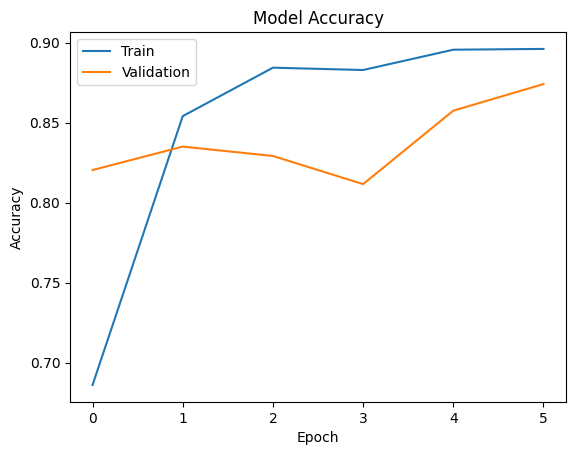

In [9]:
# Menampilkan plot akurasi pelatihan
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

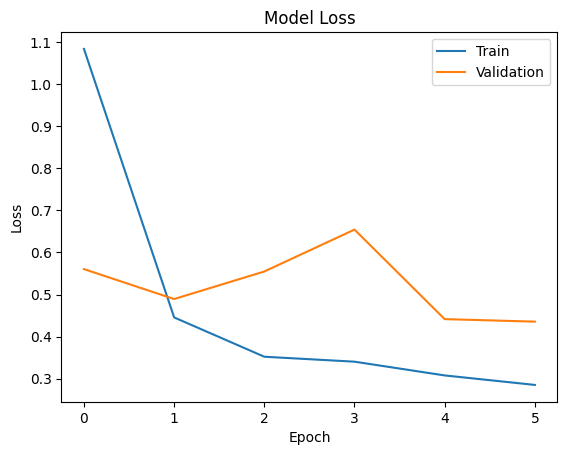

In [10]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

KLASIFIKASI KATEGORI 8 jenis barang
silahkan upload gambar SEPATU



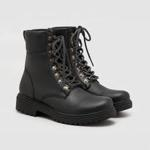

1/1 [==============================] - 0s 348ms/step
HASIL DETEKSINYA: 

Berhasil mengupload SEPATU


In [11]:
print("KLASIFIKASI KATEGORI 8 jenis barang")
inputan = input("Masukkan jenis kategori =  ").upper()
if inputan in ['LCD', 'MATRAS', 'TENDA', 'CAMERA', 'SEPATU', 'SPEAKER','PS','TAS']:
    print("silahkan upload gambar", inputan)
    print()

    # Terima input gambar dari user
    path = input("Masukkan path gambar: ")

    # Mengubah ukuran gambar sesuai dengan kebutuhan model
    img = Image.open(path).resize((150,150))

    # Menampilkan gambar yang di-upload
    display(img)

    # Mengubah gambar menjadi array
    x = np.array(img)
    # Menambahkan dimensi baru ke array
    x = np.expand_dims(x, axis=0)
    # Menggabungkan array menjadi stack
    images = np.vstack([x])

    # Melakukan prediksi dengan model
    classes = model.predict(images, batch_size=10)

    # Cek hasil prediksi
    print("HASIL DETEKSINYA: ")
    print()

    if classes[0][0] == 1:
        hasil = 'CAMERA'
    elif classes[0][1] == 1:
        hasil = 'LCD'
    elif classes[0][2] == 1:
        hasil = 'MATRAS'
    elif classes[0][3] == 1:
        hasil = 'PS'
    elif classes[0][4] == 1:
        hasil = 'SEPATU' 
    elif classes[0][5] == 1:
        hasil = 'SPEAKER' 
    elif classes[0][6] == 1:
        hasil = 'TAS'
    elif classes[0][7] == 1:
        hasil = 'TENDA'        
    else:
        print('Gambar SALAH')
        hasil = None

    if hasil is not None:
        if inputan == hasil:
            print("Berhasil mengupload", hasil)
        else:
            print("Gagal, gambar tersebut adalah", hasil, "bukan ", inputan)
else:
    print("kategori", inputan, "tidak tersedia")


      